# Projet DM Part 1 

## Partie 1/3

In [46]:
import numpy as np
import pandas as pd
import copy as cp
import statistics
import re
import math
import matplotlib.pyplot as plt 
from itertools import combinations
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

### 1.1.1 Mnipulation dataset1

Importer et visualiser le contenu du dataset1.

In [47]:
# données
dataset1 = np.genfromtxt('Dataset1.csv', delimiter=',', dtype=float)
np.set_printoptions(suppress=True)
dataset1=dataset1[1:,:]
datas=pd.read_csv('Dataset1.csv')
pd.DataFrame(datas).head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1.4792,1


Fournir une description globale du dataset.

In [48]:
def infos_dataset():
    print(f"le dataset contient {datas.shape[0]} instances")
    print(f"le dataset contient {datas.shape[1]} attributs")
    
infos_dataset()

le dataset contient 885 instances
le dataset contient 14 attributs


Fournir une description de chaque attribut.

In [49]:
pd.DataFrame(datas).describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


### 1.1.2 Analyse caracteristiques des attributs

Calculer les mesures de tendance centrale et en déduire les symétries.

In [50]:

def calcul_mediane(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    liste = cp.deepcopy(datasetCurrated)
    liste.sort()
    if liste.size % 2 !=0 :
      
        mediane=liste[((liste.size+1)//2) -1]
    else :
        mediane=(liste[(liste.size//2)-1]+liste[liste.size//2])/2
    return mediane

def val_manquante(attribut):
    L=[]
    for i in range(0,len(dataset1[:,attribut])):
        if not re.fullmatch(r"\d+\.(:?\d+)?", str(dataset1[i, attribut])):
            L.append(i)
    return L


def ecart_type(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    return np.std(datasetCurrated)
def quartiles(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    q0=np.percentile(datasetCurrated, 0)
    q1=np.percentile(datasetCurrated, 25)
    q2=np.percentile(datasetCurrated, 50)
    q3=np.percentile(datasetCurrated, 75)
    q4=np.percentile(datasetCurrated, 100)
    return q0,q1,q2,q3,q4
def tendance_centrales(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    moyenne=datasetCurrated.mean()
    mediane=np.median(datasetCurrated)
    mode = statistics.mode(datasetCurrated)

    return moyenne,mediane,mode

#################################

def tendance_centrales_homeMade(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    moyenne2= datasetCurrated.sum() / datasetCurrated.shape[0]
    mediane2=calcul_mediane(attribut)
    unique_values, counts = np.unique(datasetCurrated, return_counts=True)
    Indicemax=np.where(counts == max(counts))[0]
    mode2=[unique_values[i] for i in Indicemax]

    return moyenne2,mediane2,mode2

def quartilles_homeMade(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    liste = cp.deepcopy(datasetCurrated)
    liste.sort()
    q0=liste[0]
    q1=(liste[liste.size//4-1]+liste[liste.size//4]) /2
    q3=(liste[liste.size*3//4-1]+liste[liste.size*3//4]) /2
    q2=calcul_mediane(attribut)
    q4=liste[-1]
    return q0,q1,q2,q3,q4

def ecart_type_home_made(attribut):
     datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
     mean = np.mean(datasetCurrated)
     ecarts = [(val - mean) ** 2 for val in datasetCurrated]
     variance = np.mean(ecarts) 
     return np.sqrt(variance)

for i in range(0,dataset1.shape[1]):
    print(tendance_centrales(i))
    print(tendance_centrales_homeMade(i))
    print(quartiles(i))
    print(quartilles_homeMade(i))
    print(ecart_type(i))
    print(ecart_type_home_made(i))


(246.99774011299436, 257.0, 207.0)
(246.99774011299436, 257.0, [207.0])
(6.0, 201.0, 257.0, 307.0, 383.0)
(6.0, 201.0, 257.0, 307.0, 383.0)
77.3155979722602
77.3155979722602
(14.555266138165347, 8.1, 8.3)
(14.555266138165347, 8.1, [8.3])
(2.9, 6.8, 8.1, 10.7, 125.0)
(2.9, 6.8, 8.1, 10.7, 125.0)
21.918567580264458
21.918567580264458
(501.33898305084745, 475.0, 444.0)
(501.33898305084745, 475.0, [444.0])
(11.0, 412.0, 475.0, 581.0, 1560.0)
(11.0, 412.0, 475.0, 581.0, 1560.0)
129.03164901071148
129.03164901071148
(7.511954802259887, 7.5, 7.5)
(7.511954802259887, 7.5, [7.5])
(0.9, 7.35, 7.5, 7.63, 11.15)
(0.9, 7.35, 7.5, 7.63, 11.15)
0.4643147167054418
0.4643147167054418
(0.5439209039548023, 0.55, 0.62)
(0.5439209039548023, 0.55, [0.53, 0.62])
(0.1, 0.43, 0.55, 0.64, 0.95)
(0.1, 0.43, 0.55, 0.64, 0.95)
0.14124424677359604
0.14124424677359604
(0.6178167420814481, 0.59, 0.88)
(0.6178167420814481, 0.59, [0.88])
(0.1, 0.38, 0.59, 0.78, 24.0)
(0.1, 0.38, 0.59, 0.78, 24.0)
0.8406466256531129
0.8

Construire une boîte à moustache et afficher les données aberrantes.

{11.0, 876.0, 845.0, 887.0, 1560.0, 127.0}


<module 'matplotlib.pyplot' from 'c:\\Users\\Asus Zenbook Flip\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

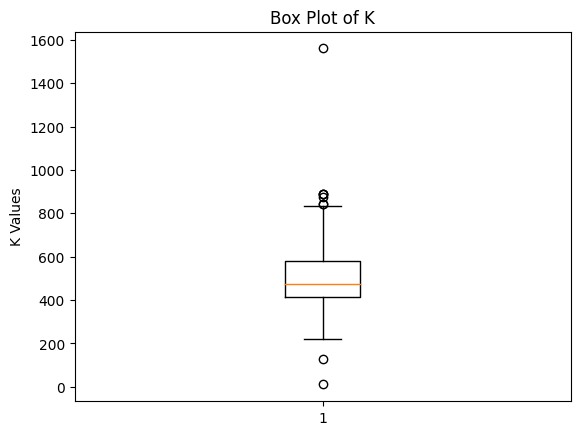

In [51]:
def Boite_a_moustache(attribut, outliers):
    abberante=[]
    liste=[]
    IQR=(quartilles_homeMade(attribut)[-2]-quartilles_homeMade(attribut)[1])*1.5
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    for var in datasetCurrated:
        if (var <=(quartilles_homeMade(attribut)[-2]+IQR) and var>=(quartilles_homeMade(attribut)[1]-IQR)):
            liste.append(var)
        else:
            abberante.append(var)  
    print(set(abberante))
    if outliers == "With Outliers":
        plt.boxplot(datasetCurrated)
    else:
        plt.boxplot(liste)

    plt.title(f'Box Plot of {datas.columns[attribut]}')
    plt.ylabel(f'{datas.columns[attribut]} Values')
    return plt
    
Boite_a_moustache(2,"With Outliers")

Construire un histogramme et visualiser la distribution des données.

<module 'matplotlib.pyplot' from 'c:\\Users\\Asus Zenbook Flip\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

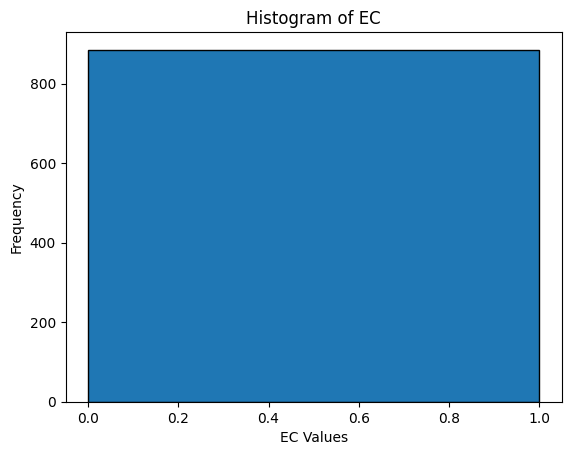

In [52]:
def Histogramme(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    plt.hist(datasetCurrated,bins=range(int(min(datasetCurrated)),math.ceil(max(datasetCurrated))+1),edgecolor='black')
    plt.title(f'Histogram of {datas.columns[attribut]}')
    plt.xlabel(f'{datas.columns[attribut]} Values')
    plt.ylabel('Frequency')
    return plt
Histogramme(4)

Construire et afficher des diagrammes de dispersion des données et en déduire les
corrélations entre les propriétés du sol

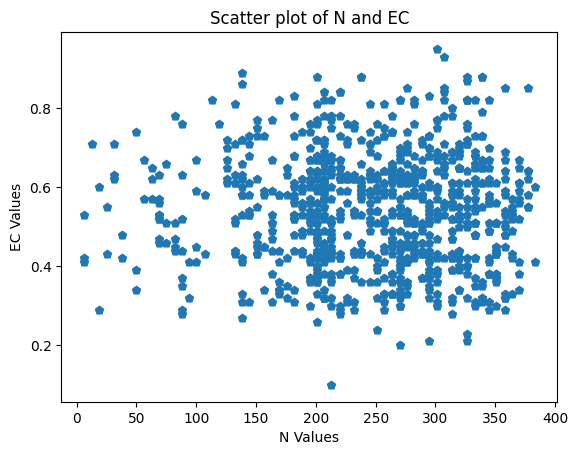

<module 'matplotlib.pyplot' from 'c:\\Users\\Asus Zenbook Flip\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [53]:
##TODO ou pas check si je dois rajouter same size ou pas ici
def scatterplot(attribut,attribut2):
    att1_name = datas.columns[attribut]
    att2_name = datas.columns[attribut2]

    plt.scatter(dataset1[:,attribut],dataset1[:,attribut2],marker ='p')
    plt.title(f'Scatter plot of {att1_name} and {att2_name}')
    plt.xlabel(f'{att1_name} Values')
    plt.ylabel(f'{att2_name} Values')
    plt.show()
    return plt

scatterplot(0,4)

{11.0, 876.0, 845.0, 887.0, 1560.0, 127.0}


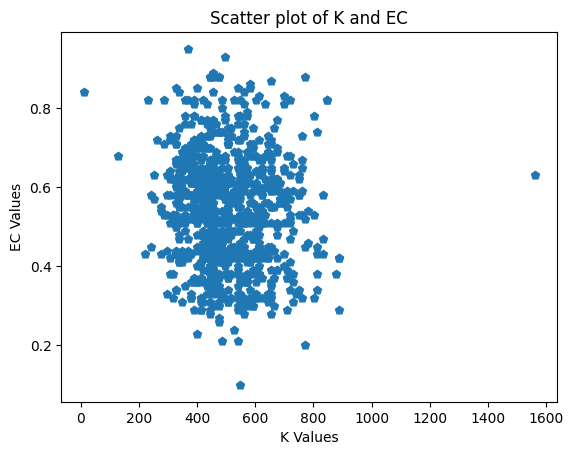

501.33898305084745 475.0 [444.0] 11.0 412.0 475.0 581.0 1560.0 129.03164901071148


In [54]:
import matplotlib.pyplot as plt

def attribute_infos(attribute, outliers, scatter_attribute):
    moyenne2, mediane2, mode2 = tendance_centrales_homeMade(attribute)
    q0, q1, q2, q3, q4 = quartilles_homeMade(attribute)
    ecart_type = ecart_type_home_made(attribute)


    hist_fig = plt.figure()
    Histogramme(attribute) 
    plt.title('Histogram')
    hist_fig.savefig("histogramme.png")
    plt.close(hist_fig)

 
    box_plot_fig = plt.figure()
    Boite_a_moustache(attribute, outliers)  
    plt.title('Box Plot')
    box_plot_fig.savefig("boxplot.png")
    plt.close(box_plot_fig)


    scatter_plot_fig = plt.figure()
    scatterplot(attribute, scatter_attribute)
    scatter_plot_fig.savefig("scatter.png")
    plt.close(scatter_plot_fig)


    plots = ["histogramme.png", "boxplot.png", "scatter.png"]
    return moyenne2, mediane2, mode2, q0, q1, q2, q3, q4, ecart_type, plots

moyenne2, mediane2, mode2, q0, q1, q2, q3, q4, ecart_type, plots = attribute_infos(2, outliers="With Outliers", scatter_attribute=4)

print(moyenne2, mediane2, mode2, q0, q1, q2, q3, q4, ecart_type)

### 1.1.3 Prétraitement

Traitement des valeurs manquantes et aberrantes :

In [55]:
#TODO   remplacement
# a.Choix de la méthode de remplacement des valeurs manquantes.
def remplacement_val_manquantes(methode,attribut):
    global dataset1
    for i in val_manquante(attribut):
        dataset1[i,attribut]= 19999

# b.Choix de la méthode de traitement des valeurs aberrantes
def remplacement_val_aberrantes(methode,attribut):
    global dataset1
    abberante=[]
    IQR=(quartilles_homeMade(attribut)[-2]-quartilles_homeMade(attribut)[1])*1.5
    for i in range(0,len(dataset1[:,attribut])):
        if (dataset1[i,attribut] >(quartilles_homeMade(attribut)[-2]+IQR) or dataset1[i,attribut]<(quartilles_homeMade(attribut)[1]-IQR)):
            #remplacer
            dataset1[i,attribut]=0 
            

def remplacement_manquant_generale(methode):
    for i in range(0,dataset1.shape[1]):
        remplacement_val_manquantes(methode,i)

def remplacement_aberantes_generale(methode):
    for i in range(0,dataset1.shape[1]):
        remplacement_val_aberrantes(methode,i)

In [61]:
df = pd.DataFrame(datas)
cols = df.columns.to_numpy()
dff = pd.DataFrame(dataset1, columns=cols)

attribute_counts = dff['Mn'].value_counts().sort_index().reset_index()
attribute_counts.columns = ['Mn', 'frequency']
print(attribute_counts.to_string(index=False))

   Mn  frequency
 0.11          1
 0.26          1
 0.84          1
 1.01          1
 1.11          1
 1.12          1
 1.13          3
 1.14          1
 1.17          1
 1.21          2
 1.22          1
 1.27          1
 1.29          1
 1.31          1
 1.38          1
 1.42          1
 1.43          1
 1.72          1
 1.77          1
 1.82          1
 1.88          2
 1.89          1
 1.99          2
 2.00          3
 2.10          1
 2.11          3
 2.13          1
 2.15          3
 2.16          3
 2.17          1
 2.19          2
 2.20          1
 2.24          2
 2.27          2
 2.29          1
 2.31          1
 2.35          1
 2.38          1
 2.42          1
 2.43          6
 2.44          1
 2.46          1
 2.50          1
 2.53          1
 2.62          1
 2.65          3
 2.66          1
 2.67          1
 2.68          1
 2.69          3
 2.70          1
 2.71          2
 2.72          2
 2.74          1
 2.75          3
 2.76          4
 2.77          1
 2.78         

Réduction des données (élimination des redondances) horizontales / verticales.

In [ ]:
#Réduction des données (élimination des redondances) horizontales / verticales.
def reduire_row():
     global dataset1
     dataset1= np.unique(dataset1, axis=0, return_index=False)

def coef_correl(attribut1,attribut2):
    moy1=np.mean(dataset1[:,attribut1])
    moy2=np.mean(dataset1[:,attribut2])
    e1=ecart_type_home_made(attribut1)
    e2=ecart_type_home_made(attribut2)
    return (dataset1[:,attribut1].dot(dataset1[:,attribut2])-(len(dataset1)*moy1*moy2))/((len(dataset1)-1)*(e1*e2))

def reduire_dim(treashold):
    global dataset1
    for i in range(0,dataset1.shape[1]):
        for j in range(i+1,dataset1.shape[1]):
            if (np.abs(coef_correl(i,j))>treashold):
                    dataset1 = np.delete(dataset1,j, axis=1)
#reduire_row()

correlation_matrix = np.corrcoef(dataset1[:,0],dataset1[:,1])
pearson_coefficient = correlation_matrix[0, 1]

print("Pearson Correlation Coefficient:", pearson_coefficient)

coef_correl(0,1)

Pearson Correlation Coefficient: nan


nan

Normalisation des données :

In [ ]:
def normalisation(methode,attribut, vmin, vmax):
    global dataset1
    if methode == "Vmin-Vmax":
        vminOld = np.min(dataset1[:,attribut])
        vmaxOld = np.max(dataset1[:,attribut])
        dataset1[:, attribut] = vmin+(((vmax-vmin)*(dataset1[:, attribut]-vminOld))/(vmaxOld-vminOld))
    else:
        vmean=np.mean(dataset1[:,attribut])
        s=np.mean( (dataset1[:,attribut]  -vmean)**2)
        for  val in range(0,dataset1[:,attribut].shape[0]):
            dataset1[val,attribut]=(dataset1[val,attribut]-vmean)/s 
   
def normalisation_generale(methode, vmin , vmax):
    for i in range(0,dataset1.shape[1]):
        normalisation(methode,i, vmin, vmax)


In [ ]:
def preprocessing_general(manque_meth, aberrante_meth, normalization_meth, vmin, vmax):
     global dataset1
     remplacement_manquant_generale(manque_meth)
     remplacement_aberantes_generale(aberrante_meth)
     normalisation_generale(normalization_meth, vmin, vmax) 

     return dataset1

In [ ]:
import gradio as gr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


inputs = [gr.Dataframe(label="Dataset1", value=pd.DataFrame(datas))]
outputs = [gr.Textbox(label="Number of Rows"), gr.Textbox(label="Number of Columns"), gr.Dataframe(label="Attributes description")]

def infos_dataset(dataframe):
    num_rows, num_cols = pd.DataFrame(dataframe).shape
    attr_desc = pd.DataFrame(dataframe).describe()
    return num_rows, num_cols, attr_desc


edh_inputs = [gr.Dropdown([(f"{att}", i) for i, att in enumerate(datas.columns.tolist())], multiselect=False, label="Attributes", info="Select an attribute : "), gr.Radio(["With Outliers", "Without Outliers"], label="Box Plot Parameters"), gr.Dropdown([(f"{att}", i) for i, att in enumerate(datas.columns.tolist())], multiselect=False, label="Scatter Plot Parameters", info="Select a second attribute for the scatter plot : ")]
edh_outputs = [gr.Textbox(label="Mean"), gr.Textbox(label="Median"), gr.Textbox(label="Mode"), gr.Textbox(label="Q0"), gr.Textbox(label="Q1"), gr.Textbox(label="Q2"), gr.Textbox(label="Q3"), gr.Textbox(label="Q4"), gr.Textbox(label="Ecart Type"), gr.Gallery(label="Attribute Visualisation", columns=(1,2))]

preprocess_inputs = [gr.Dropdown(["Method 1", "Method 2"], multiselect=False, label="Missing Values", info="Select a method to handle the missing values in the dataset :"), 
                     gr.Dropdown(["Method 1", "Method 2"], multiselect=False, label="Outliers", info="Select a method to handle the outliers in the dataset :"), 
                     gr.Dropdown(["Vmin-Vmax", "Z-Score"], multiselect=False, label="Normalization", info="Select a method to normalize the dataset :"),
                     gr.Textbox(label="Vmin", value=0),
                     gr.Textbox(label="Vmax", value=0)]
preprocess_outputs = [gr.Dataframe(label="Dataset1 preprocessed", headers=datas.columns.tolist())]


# def preprocess(manque_meth, aberrante_meth, normalization_meth, vmin, vmax):
#     if normalization_meth == "Vmin-Vmax":
#           preprocess_inputs.gr.Textbox(value="Vmin", visible=True)
#           preprocess_inputs.gr.Textbox(value="Vmax", visible=True)
#     preprocessing_general(manque_meth, aberrante_meth, normalization_meth, vmin, vmax)
     
with gr.Blocks() as demo:
            with gr.Tab("Agriculture"):
                    with gr.Column():
                        with gr.Tab("Dataset"):
                            dashboard_interface = gr.Interface(infos_dataset, inputs=inputs, outputs=outputs, title="Dataset Analysis Dashboard")

                        with gr.Tab("EDH"):
                            attributes_interface = gr.Interface(attribute_infos, inputs=edh_inputs, outputs=edh_outputs, title="Attributes Analysis")
                            
                        with gr.Tab("Preprocessing"):
                            preprocessing_interface = gr.Interface(preprocessing_general, inputs=preprocess_inputs, outputs=preprocess_outputs, title="Preprocessing")

                        with gr.Tab("Classification"):

                            gr.Markdown("hh")
                        with gr.Tab("Clustering"):
                            gr.Markdown("hh")
                        with gr.Tab("Recommender"):
                            gr.Markdown("hh")                   

            with gr.Tab("COVID-19"):
                gr.Markdown("covid19 part")

demo.launch()


c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\inference\_text_generation.py:121: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.4/migration/
  @validator("best_of")
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\inference\_text_generation.py:140: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. Yo

KeyboardInterrupt: 

In [ ]:
import gradio as gr

def closest_match(x):
    return x + ": The Definitive Edition"

def Dropdown_list(x):
    new_options =  [*options, x + " Remastered", x + ": The Remake", x + ": Game of the Year Edition", x + " Steelbook Edition"]
    return gr.Dropdown.update(choices=new_options)


def Recommend_new(x):
  return x + ": Highest Cosine Similarity"

demo = gr.Blocks()

options = ['Placeholder A', 'Placeholder B', 'Placeholder C']
with demo:
    text_input = gr.Textbox(label="Search bar")
    b1 = gr.Button("Match Closest Title")

    text_options = gr.Dropdown(options, label="Top 5 options")
    b2 = gr.Button("Provide Additional options")
    
    new_title = gr.Textbox(label="Here you go!")
    b3 = gr.Button("Recommend a new title")

    b1.click(closest_match, inputs=text_input, outputs=text_options)
    b2.click(Dropdown_list, inputs=text_input, outputs=text_options)
    b3.click(Recommend_new, inputs=text_options, outputs=new_title)
    # text_options.update(interactive=True)


demo.launch(debug=True)

c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\routes.py:791: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  @app.on_event("startup")
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastapi\applications.py:4547: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  return self.router.on_event(event_type)
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\analytics.py:93: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(latest_pkg_version) > StrictVersion(cu

Running on local URL:  http://127.0.0.1:7886

To create a public link, set `share=True` in `launch()`.


c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\analytics.py:93: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(latest_pkg_version) > StrictVersion(current_pkg_version):
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\analytics.py:93: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(latest_pkg_version) > StrictVersion(current_pkg_version):
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\analytics.py:93: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(latest_pkg_version) > StrictVersion(current_pkg_version):
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\analytics.py:93: DeprecationWarning: distutils Version classes are depr

Keyboard interruption in main thread... closing server.


Traceback (most recent call last):
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\queueing.py", line 427, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1525, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1147, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zen

## Part 3/3

In [ ]:

csv_file_path = 'Dataset3.xlsx - 8.forFMI.csv'
dataset3 = pd.read_csv(csv_file_path, delimiter=',', decimal=',')
dataset3=dataset3.to_numpy()
print(dataset3)


c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\analytics.py:93: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(latest_pkg_version) > StrictVersion(current_pkg_version):
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\analytics.py:93: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if StrictVersion(latest_pkg_version) > StrictVersion(current_pkg_version):


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset3.xlsx - 8.forFMI.csv'

Traceback (most recent call last):
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\queueing.py", line 427, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1525, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1147, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus Zen

### 1 discrétiser ces données continues de cet attribut, en utilisant ces 2

29.87
[[24.486666666666668 82.84 295.61 'Clayey' 'rice' 'DAP']
 [28.410322580645165 96.65 178.96 'laterite' 'Coconut' 'Good NPK']
 [20.460588235294114 81.64 270.44 'silty clay' 'rice' 'MOP']
 ...
 [24.486666666666668 83.54 230.45 'Clayey' 'rice' 'MOP']
 [25.41224489795918 83.47 217.38 'Clayey' 'rice' 'MOP']
 [23.524482758620696 84.81 298.56 'silty clay' 'rice' 'MOP']]


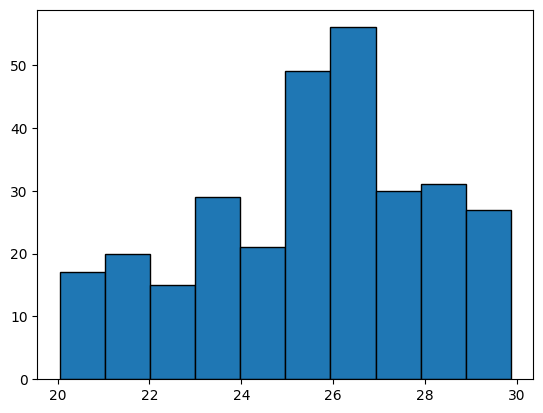

In [ ]:
def Discretisation(methode,attribut):
    global dataset3
    vals=dataset3[:,attribut].copy()
    vals.sort()

    if methode:
        q = int(input("Entrez nbr de partie "))
        nbrelmt=math.ceil(dataset3[:,attribut].shape[0]/q)
        
        for  val in range(0,dataset3[:,attribut].shape[0]):  
            for i in range(0,vals.shape[0],nbrelmt):
                if(vals[i]>dataset3[val,attribut]):
                    sup=i
                    break
            dataset3[val,attribut]=np.mean(vals[sup-nbrelmt:sup])       
    else:

        #discretisation
        K=1+(10/3)*np.log10(dataset3.shape[0])
        print(max(dataset3[:,0]))
        largeur= (dataset3[:,attribut].max() - dataset3[:,attribut].min())/math.ceil(K)
        
        dic={}
        bornesup= dataset3[:,attribut].min()+largeur
        for val in vals:
            if val>=bornesup and bornesup<dataset3[:,attribut].max():
                bornesup+=largeur

            if bornesup in dic:   
                dic[bornesup].append(val)
            else:
                dic[bornesup]=[val]

        #remplacement 
        for i in range(0,dataset3[:,attribut].shape[0]):
            for item in dic.items():
                 if (dataset3[i,attribut]>=item[0]-largeur and dataset3[i,attribut]<item[0]):
                     dataset3[i,attribut]=np.mean(item[1])
                     break     
             
def Histogramme(attribut):
    plt.hist(dataset3[:,attribut],bins=10,edgecolor='black')

Histogramme(0)
Discretisation(0,0)

print(dataset3)

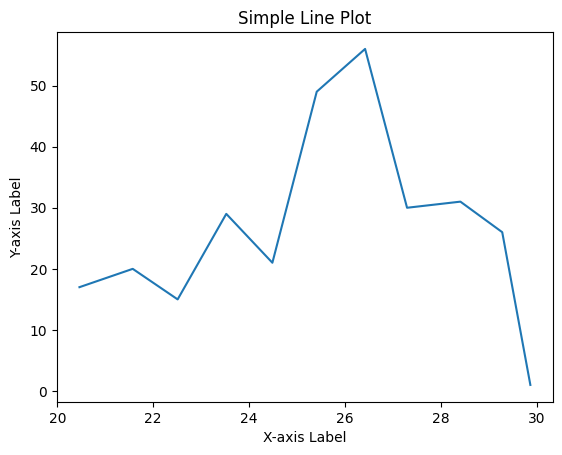

In [ ]:
import matplotlib.pyplot as plt
from  collections import Counter
# Data
freq=Counter(dataset3[:,0])

x_values = np.sort(list(freq.keys()))
y_values = [freq[x] for x in x_values]

# Create a line plot
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')

# Show the plot
plt.show()


### 2 Extraction des motifs fréquents puis les règles d’association en utilisant l’algorithme Apriori .
Effectuer des expérimentations en variant les valeurs de Min_Supp et Min_Conf.

In [ ]:

def Ck_generator(k,L,datasetT):
    if k==1:
        uniItemListe=set()
        for i in range(0,len(datasetT)):
            uniItemListe.update(set(datasetT[i] ))
        return [(v,) for v in uniItemListe]
    else:
        C=[]
        if len(L)==0: return C
        listeitemsunique=sorted(set([element for tuple in L for element in tuple]))
        if len(listeitemsunique)<k: return []
        combinations_list = list(combinations(listeitemsunique, k))
        if k==2: 
            return combinations_list
        #le pruning
        for combi in combinations_list:
            exist=True
            sous_combinations_list = list(combinations(combi, k-1))
            
            for sous_combi in sous_combinations_list:
                if sous_combi not in L:
                    exist=False
                    break
            if exist==True:
                C.append(combi)   
        return C

def support_calculator(C,k,datasetT):
    dico={}
    dico.update({val:0 for val in C})
    for row in datasetT:
        combinations_list = list(combinations(row, k))
        for val in combinations_list:
            if val in dico: 
                dico[val]+=1

    C=[[key, value] for key ,value in dico.items()]
    C=np.array(C,dtype=object)
    return C

def Lk_generator(C,supp_min):
    C=np.array([elmt[0] for elmt in C if elmt[1]>=supp_min])
    return C


In [ ]:
#form transaction table
dataset3=np.delete(dataset3,[1,2],axis=1)
dataset3 = [np.sort(list(three)) for three in zip(dataset3[:,1],dataset3[:,2],dataset3[:,3])]
print(dataset3)

[array(['Clayey', 'DAP', 'rice'], dtype='<U6'), array(['Coconut', 'Good NPK', 'laterite'], dtype='<U8'), array(['MOP', 'rice', 'silty clay'], dtype='<U10'), array(['Coconut', 'Urea', 'sandy'], dtype='<U7'), array(['Coconut', 'Urea', 'coastal'], dtype='<U7'), array(['Urea', 'clay loam', 'rice'], dtype='<U9'), array(['Coconut', 'Urea', 'alluvial'], dtype='<U8'), array(['Clayey', 'DAP', 'rice'], dtype='<U6'), array(['Coconut', 'Urea', 'coastal'], dtype='<U7'), array(['Urea', 'rice', 'silty clay'], dtype='<U10'), array(['Coconut', 'DAP', 'alluvial'], dtype='<U8'), array(['Coconut', 'DAP', 'laterite'], dtype='<U8'), array(['Coconut', 'Good NPK', 'sandy'], dtype='<U8'), array(['DAP', 'clay loam', 'rice'], dtype='<U9'), array(['Coconut', 'Urea', 'sandy'], dtype='<U7'), array(['Clayey', 'Urea', 'rice'], dtype='<U6'), array(['DAP', 'rice', 'silty clay'], dtype='<U10'), array(['Coconut', 'Urea', 'coastal'], dtype='<U7'), array(['Coconut', 'Urea', 'laterite'], dtype='<U8'), array(['Coconut', 'Ure

In [ ]:
def appriori(min_supp,datasetT):
    min_supp=min_supp*len(datasetT)
    L=[]
    k=1
    C=Ck_generator(k,None,datasetT)
    #print(C)
    while(len(C)!=0):
        S=support_calculator(C,k,datasetT)
        print(f"{S}\n")
        l=Lk_generator(S,min_supp)
        if len(l)!=0:L.append(l)
        #print(f"{l}\n")
        k+=1
        C=Ck_generator(k,l,None)
        #print(f"{C}\n")
    
    return L
print(appriori(0.2,dataset3))

[[('Coconut',) 152]
 [('silty clay',) 65]
 [('coastal',) 50]
 [('alluvial',) 26]
 [('Clayey',) 54]
 [('Urea',) 101]
 [('rice',) 143]
 [('DAP',) 86]
 [('clay loam',) 24]
 [('laterite',) 28]
 [('Good NPK',) 33]
 [('sandy',) 48]
 [('MOP',) 75]]

[[('Coconut', 'DAP') 39]
 [('Coconut', 'MOP') 37]
 [('Coconut', 'Urea') 53]
 [('Coconut', 'rice') 0]
 [('Coconut', 'silty clay') 0]
 [('DAP', 'MOP') 0]
 [('DAP', 'Urea') 0]
 [('DAP', 'rice') 47]
 [('DAP', 'silty clay') 26]
 [('MOP', 'Urea') 0]
 [('MOP', 'rice') 38]
 [('MOP', 'silty clay') 16]
 [('Urea', 'rice') 48]
 [('Urea', 'silty clay') 22]
 [('rice', 'silty clay') 65]]

[array([['Coconut'],
       ['silty clay'],
       ['Urea'],
       ['rice'],
       ['DAP'],
       ['MOP']], dtype='<U10'), array([['rice', 'silty clay']], dtype='<U10')]


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_ary = te.fit(dataset3).transform(dataset3)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(frequent_itemsets)

# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
# print(rules)


    support            itemsets
0  0.515254           (Coconut)
1  0.291525               (DAP)
2  0.254237               (MOP)
3  0.342373              (Urea)
4  0.484746              (rice)
5  0.220339        (silty clay)
6  0.220339  (silty clay, rice)


### 3 Extraction des fortes règles d’associations 

### 4.Options avancées de l’IHM :